<a href="https://colab.research.google.com/github/Omorusi/Multinomial_Naive_Bayes./blob/main/Copy_of_Multinomial_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/jakevdp/PythonDataScienceHandbook/blob/8a34a4f653bdbdc01415a94dc20d4e9b97438965/notebooks/05.05-Naive-Bayes.ipynb


Multinomial Naive Bayes


In [ ]:
# load the dataset
import pandas as pd

data = pd.read_csv('/content/twitter_training.csv')
data.head()


,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
# renaming the columns as they do not show what are the meaning of each data
data = data.rename(columns={'2401': 'Number'})
data =  data.rename(columns={'Borderlands' : 'Topic'})
data =  data.rename(columns={'Positive' : 'Emotional'})
data =  data.rename(columns={'im getting on borderlands and i will murder you all ,' : 'Comments'}) # this columns is not chaning
print(data.columns)

Index(['Number', 'Topic', 'Emotional', 'Comments'], dtype='object')


In [ ]:
print(data.columns)

Index(['Number', 'Topic', 'Emotional', 'Comments'], dtype='object')


In [ ]:
print(data.columns)

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')


In [ ]:
data.head()

,Number,Topic,Emotional,Comments
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
print(data['Emotional'].unique())  # target column


['Positive' 'Neutral' 'Negative' 'Irrelevant']


In [ ]:
# Get the number of rows and columns
rows, columns = data.shape

print(f"Dataset has {rows} rows and {columns} columns.")


Dataset has 68431 rows and 4 columns.


In [ ]:
# dropping data from the dataset that is empty
data = data.dropna(subset=['Comments'])

In [ ]:
# Get the number of rows and columns
rows, columns = data.shape

print(f"Dataset has {rows} rows and {columns} columns.")


Dataset has 67829 rows and 4 columns.


Index(['Number', 'Topic', 'Emotional', 'Comments'], dtype='object')
Emotional
Negative      20694
Positive      18578
Neutral       16138
Irrelevant    12419
Name: count, dtype: int64


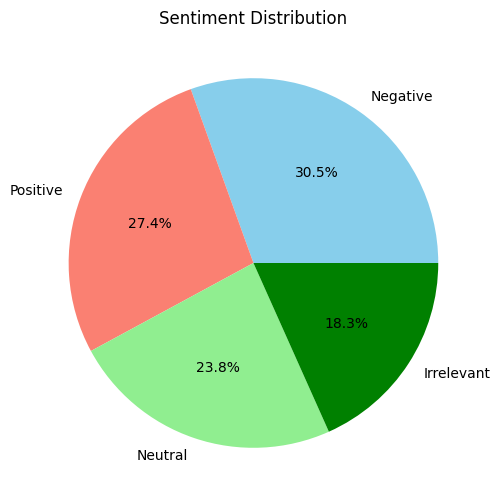

In [ ]:
# Pie chart for sentiment distribution
import matplotlib.pyplot as plt

# Check if the 'Sentiment' column exists
print(data.columns)

# Count unique sentiment values
sentiment_counts = data['Emotional'].value_counts()
print(sentiment_counts)  # Print to verify

plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon', 'lightgreen','green' ])
plt.title("Sentiment Distribution")
plt.show()

In [ ]:
#Machine learning models (like Multinomial Naive Bayes) can only process numerical data, not raw text. Since text data is unstructured, we must convert it into a structured, numerical format.
from sklearn.feature_extraction.text import CountVectorizer

# Define features and target
X = data['Comments']
y = data['Emotional']

# Convert text into numerical vectors
vectorizer = CountVectorizer(stop_words='english')
X_vectorized = vectorizer.fit_transform(X)



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [ ]:
# Split dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Train Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report

# Train Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


# Display classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

  Irrelevant       0.84      0.65      0.73      2516
    Negative       0.72      0.86      0.78      4151
     Neutral       0.84      0.66      0.74      3222
    Positive       0.73      0.82      0.77      3677

    accuracy                           0.76     13566
   macro avg       0.78      0.75      0.76     13566
weighted avg       0.77      0.76      0.76     13566



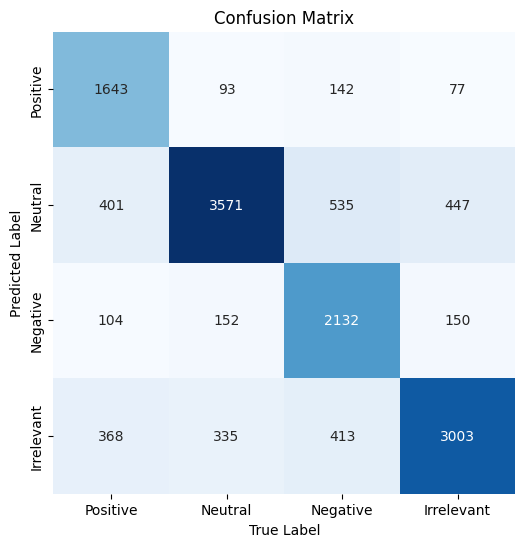

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
mat = confusion_matrix(y_test, y_pred)

# Get unique labels
labels = data['Emotional'].unique()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=labels, yticklabels=labels, cmap="Blues")

plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Check accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.76
